In [58]:
import seaborn as sns
df= sns.load_dataset("titanic")

In [59]:
data= df

In [35]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [37]:
## easy thing to do is to delete those rows where there are missing values (Problem is u losse huge no of data points)
df.dropna().shape    # see we lost huge no of data points

(182, 15)

In [38]:
# Column wise deletion
#here if we see the deck column has lot of nan values , so we can delete that column form data set
df.dropna(axis= 1)    # not changed in original dataset (inplace is considered)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## imputational misssing values
# 1- Mean value imputation


<AxesSubplot: xlabel='age', ylabel='Count'>

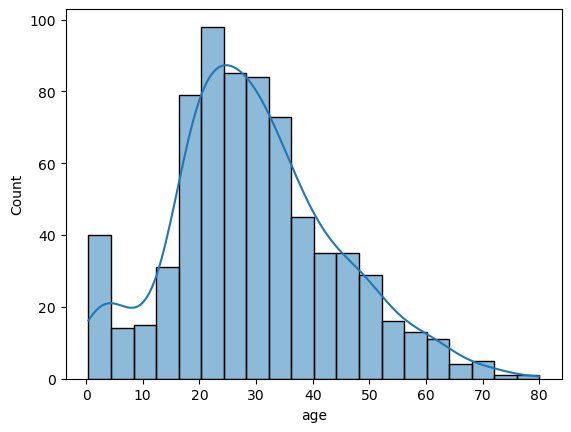

In [39]:
sns.histplot(df["age"], kde= True)

In [40]:
df["age_mean"]= data["age"].fillna(data["age"].mean())

In [41]:
df[["age_mean", "age"]]   # Now 

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [42]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000


In [24]:
## Mean imputation works well when we have normally distributed data

## 2- Median imputation works well when we have outliers

In [43]:
df["age_median"] = df["age"].fillna(df["age"].median())

In [44]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0


# 3- Mode imputation technique----Can be used for categorical columns

In [45]:
# for example here we have some nan values in embarked column

In [46]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_mean         0
age_median       0
dtype: int64

In [47]:
df[df["embarked"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [48]:
df["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [51]:
df[df["embarked"].notna()]   # data set without nan embarked column

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0


In [52]:
mode_value= df[df["embarked"].notna()]["embarked"].mode()[0]

In [53]:
mode_value

'S'

In [54]:
df["embarked_mode"]= df["embarked"].fillna(mode_value)

In [55]:
df[["embarked_mode", "embarked"]]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [57]:
df["embarked_mode"].isnull().sum()   # Nan values are filled

0

In [60]:
## random_sampling

import random
random_value= random.choice(df["age"])


In [61]:
random_value

18.0

In [65]:
df["age"]= df["age"].fillna(random_value)

In [67]:
df["age"].isnull().sum()   # Nan age filled with random value

0

# Handling Imbalance dataset

#Upsampling
#
Downsampling

In [6]:
import numpy as np
import pandas as pd

n_samples= 1000
class_0_ratio = 0.9
n_class_0= int(class_0_ratio*n_samples)
n_class_1= n_samples- n_class_0

In [22]:
# Create a dataframe woth imbalance dataset

class_0= pd.DataFrame({"feature_1" : np.random.normal(loc= 0, scale =1 , size= n_class_0), 
                       "feature_2": np.random.normal(loc= 0, scale= 1, size= n_class_0), 
                       "target": [0]*n_class_0
                      })

class_1= pd.DataFrame({"feature_1" : np.random.normal(loc= 2, scale =1 , size= n_class_1), 
                       "feature_2": np.random.normal(loc= 2, scale= 1, size= n_class_1), 
                       "target": [1]*n_class_1
                      })

In [23]:
df= pd.concat([class_0, class_1]).reset_index(drop = True)

In [24]:
df["target"].value_counts()

0    900
1    100
Name: target, dtype: int64

In [25]:
## Upsampling

df_minority= df[df["target"]==1]
df_majority= df[df["target"]==0]

In [26]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [27]:
df_minority_upsampled

,feature_1,feature_2,target
951,1.309916,3.454897,1
992,2.728959,2.465094,1
914,0.575185,3.159306,1
971,2.272578,2.346880,1
960,0.761122,-0.015057,1
...,...,...,...
952,2.101596,2.951782,1
965,2.012183,0.870041,1
976,1.991088,0.983924,1
942,3.813951,2.918136,1


In [29]:
pd.concat([df_majority, df_minority_upsampled])

,feature_1,feature_2,target
0,0.593678,0.060157,0
1,0.965499,-0.051591,0
2,-0.515324,1.740571,0
3,-0.100383,-1.001152,0
4,-0.286553,-0.713603,0
...,...,...,...
952,2.101596,2.951782,1
965,2.012183,0.870041,1
976,1.991088,0.983924,1
942,3.813951,2.918136,1


In [30]:
# Downsampling

class_0= pd.DataFrame({"feature_1" : np.random.normal(loc= 0, scale =1 , size= n_class_0), 
                       "feature_2": np.random.normal(loc= 0, scale= 1, size= n_class_0), 
                       "target": [0]*n_class_0
                      })

class_1= pd.DataFrame({"feature_1" : np.random.normal(loc= 2, scale =1 , size= n_class_1), 
                       "feature_2": np.random.normal(loc= 2, scale= 1, size= n_class_1), 
                       "target": [1]*n_class_1
                      })

df= pd.concat([class_0, class_1]).reset_index(drop= True)

In [32]:
df["target"].value_counts()

0    900
1    100
Name: target, dtype: int64

In [33]:

df_minority= df[df["target"]==1]
df_majority= df[df["target"]==0]

In [34]:
from sklearn.utils import resample
df_majority_downsampled=resample(df_majority, #Sample With replacement
         n_samples=len(df_minority),
         random_state=42
        )

In [35]:
df_majority_downsampled.shape

(100, 3)

In [37]:
df_downsampled= pd.concat([df_minority, df_majority_downsampled])

In [39]:
df_downsampled

,feature_1,feature_2,target
900,0.733382,2.286154,1
901,3.070012,2.449520,1
902,2.980784,2.187563,1
903,1.575319,1.776858,1
904,1.951503,4.320549,1
...,...,...,...
201,-2.003363,1.390602,0
269,-0.450662,-1.647664,0
862,0.120261,-0.212509,0
815,0.551874,1.249708,0


In [40]:
df_downsampled["target"].value_counts()

1    100
0    100
Name: target, dtype: int64

# SMOTE (Synthetic Minority Oversampling Technique)

In [71]:
from sklearn.datasets import make_classification

In [72]:
X, y= make_classification(n_samples= 1000, n_features= 2, n_clusters_per_class= 1,n_redundant= 0,  weights= [0.90], random_state= 12)

In [73]:
X

array([[-0.76289759, -0.70680807],
       [-1.07543571, -1.0511621 ],
       [-0.61011459, -0.90980157],
       ...,
       [-1.32643852, -1.815178  ],
       [-0.83348573, -0.5146474 ],
       [-0.30287558, -0.57597532]])

In [74]:
y

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [75]:
import pandas as pd
df1= pd.DataFrame(X, columns= ["f1", "f2"])
df2= pd.DataFrame(y, columns= ["target"])

In [76]:
df= pd.concat([df1, df2], axis= 1)

In [77]:
df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


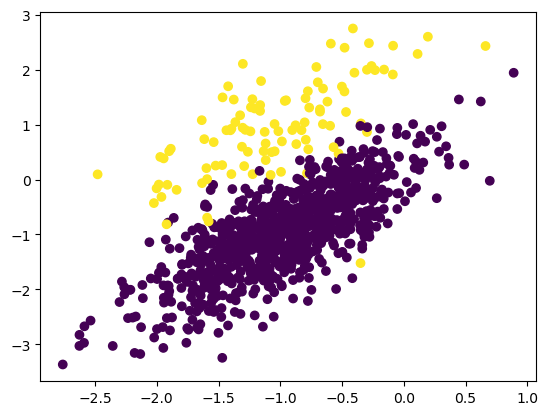

In [78]:
import matplotlib.pyplot as plt
plt.scatter(df["f1"], df["f2"], c= df["target"])

In [79]:
df["target"].value_counts()

0    900
1    100
Name: target, dtype: int64

In [82]:
#Apply smote

!pip install imblearn

In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
oversample= SMOTE()
X, y= oversample.fit_resample(df[["f1", "f2"]], df["target"])

In [88]:
X.shape

(1800, 2)

In [89]:
y.shape

(1800,)

In [94]:
len(y[y==0])

900

In [95]:
len(y[y==1])

900

In [97]:
df1= pd.DataFrame(X, columns= ["f1", "f2"])
df2= pd.DataFrame(y, columns= ["target"])
df_oversampled= pd.concat([df1, df2], axis= 1)

In [98]:
df_oversampled

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
1795,-0.913608,1.445319,1
1796,-1.971668,-0.279736,1
1797,-1.268324,0.516294,1
1798,-1.665139,-0.545370,1


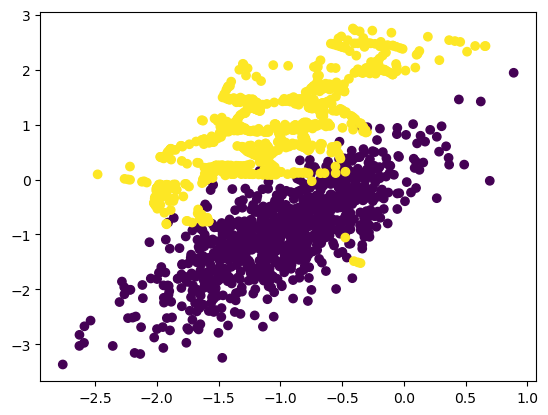

In [100]:
plt.scatter(df_oversampled["f1"], df_oversampled["f2"], c= df_oversampled["target"])

# Data Interpolation

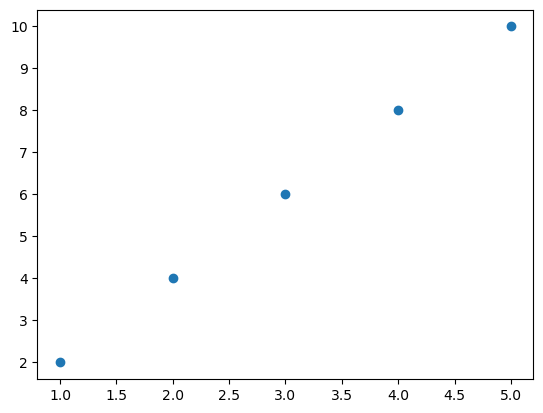

In [101]:
## 1. Linear Interpolation
import numpy as np
x= np.array([1,2,3,4,5])
y= np.array([2,4,6,8,10])
plt.scatter(x, y)

In [103]:
## interpolate the data using the linear interpolation
x_new= np.linspace(1, 5, 10)  ## create new x values
y_interp= np.interp(x_new, x, y)

In [104]:
y_interp

array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
        6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ])

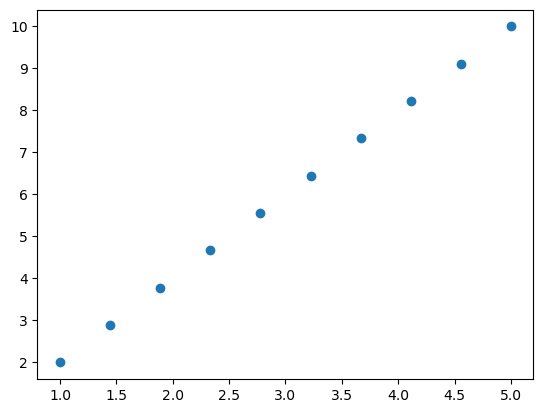

In [105]:
plt.scatter(x_new, y_interp)

## 2. Cubic Interpolation with scipy

In [107]:
import numpy as np
x= np.array([1,2,3,4,5])
y= np.array([1,8,27,64,125])

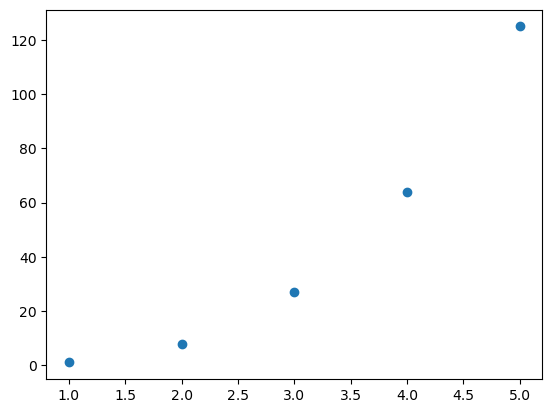

In [113]:
plt.scatter(x, y)

In [108]:
from scipy.interpolate import interp1d

In [109]:
f= interp1d(x, y, kind= "cubic")

In [110]:
x_new= np.linspace(1, 5, 10)
y_interp= f(x_new)

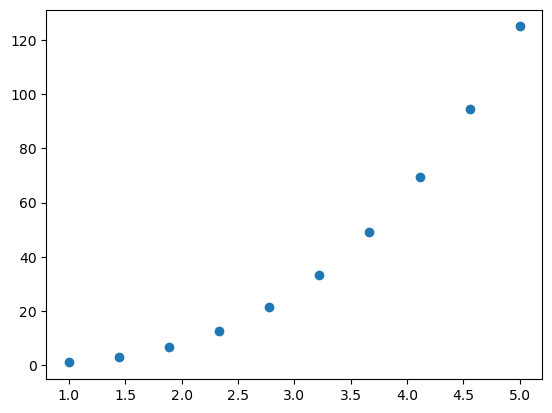

In [112]:
plt.scatter(x_new, y_interp)

## 3. Polynomial interpolation

In [114]:
import numpy as np
x= np.array([1,2,3,4,5])
y= np.array([1,4,9,16,25])

In [115]:
# interpolate the data using polynomial interpolation
p= np.polyfit(x, y, 2)

In [117]:
x_new= np.linspace(1,5, 10)
y_interp= np.polyval(p, x_new)

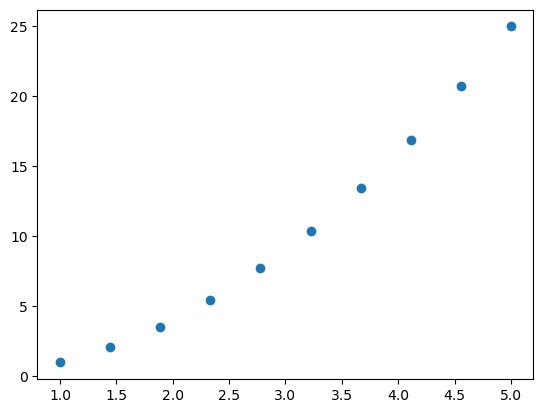

In [118]:
plt.scatter(x_new, y_interp)

# 5 number summary and Box plot

In [1]:
import numpy as np

In [3]:
list_marks= [35, 56, 99, 23, 65, 22, 57, 86, 57, 90, 35,75, 64, 87, 31]
minimum, Q1, median, Q3, maximum= np.quantile(list_marks, [0, 0.25, 0.50, 0.75, 1.0])

In [4]:
minimum, Q1, median, Q3, maximum

(22.0, 35.0, 57.0, 80.5, 99.0)

In [5]:
IQR= Q3- Q1

In [6]:
lower_fence= Q1- 1.5*IQR
higher_fence= Q3+1.5*IQR

In [29]:
list_marks= [-100, 35, 56, 99, 23, 65, 22, 57, 86, 57, 90, 35,75, 64, 87, 31, 150,200 , 535, 342]

<AxesSubplot: >

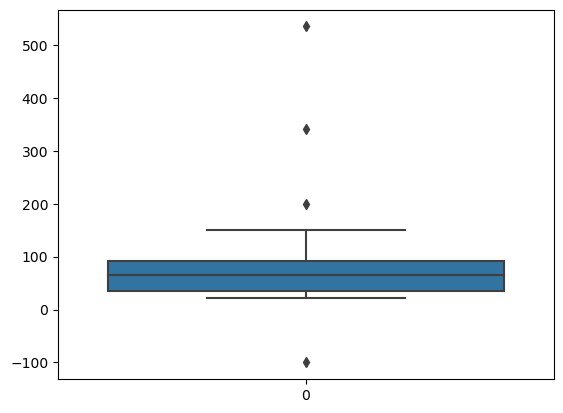

In [30]:
import seaborn as sns
sns.boxplot(list_marks)

# Feature Scaling

In [31]:
import seaborn as sns
df= sns.load_dataset("tips")

In [32]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
import numpy as np
mean= np.mean(df["total_bill"])
std= np.std(df["total_bill"])
mean, std

(19.78594262295082, 8.88415057777113)

In [35]:
normalized_data= []
for i in list(df["total_bill"]):
    z_score= (i-mean)/std
    normalized_data.append(z_score)

In [36]:
normalized_data

[-0.31471130509049433,
 -1.0632353132988694,
 0.13777989987156147,
 0.4383151031672548,
 0.5407447042905061,
 0.6195367051545456,
 -1.2399545152367868,
 0.7985071071171497,
 -0.5342033074974615,
 -0.5634689078183904,
 -1.0711145133852735,
 1.7417599174609368,
 -0.49143050702841135,
 -0.1526249033130415,
 -0.5578409077566732,
 0.20193910057513614,
 -1.0643609133112129,
 -0.39350330595453376,
 -0.31696250511518115,
 0.09725829942719796,
 -0.21003050394255576,
 0.05673669898283485,
 -0.4520345065963916,
 2.2100095225958007,
 0.0038334984026941687,
 -0.22241210407833373,
 -0.7221785095588128,
 -0.7987193103981655,
 0.2154463007232573,
 -0.01530170180714419,
 -1.1521577142739996,
 -0.16162970341178867,
 -0.5319521074727744,
 0.10176069947657196,
 -0.22578890411536373,
 0.4810879036363047,
 -0.39125210592984694,
 -0.3214649051645547,
 -0.12335930299211235,
 1.2926455125359118,
 -0.4216433062631193,
 -0.26180810451035325,
 -0.6580193088552377,
 -1.1375249141135353,
 1.1947183114620339,
 -0.16

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

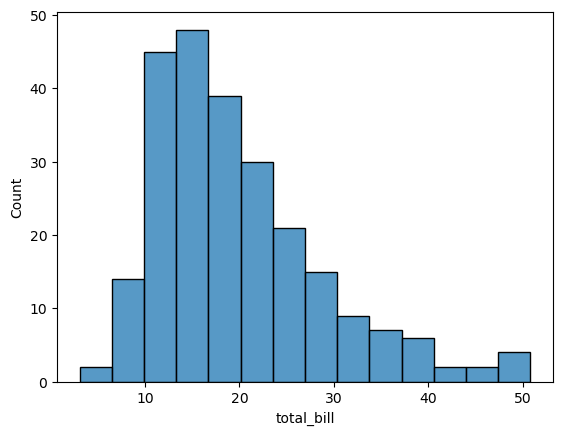

In [37]:
sns.histplot(df["total_bill"])

<AxesSubplot: ylabel='Count'>

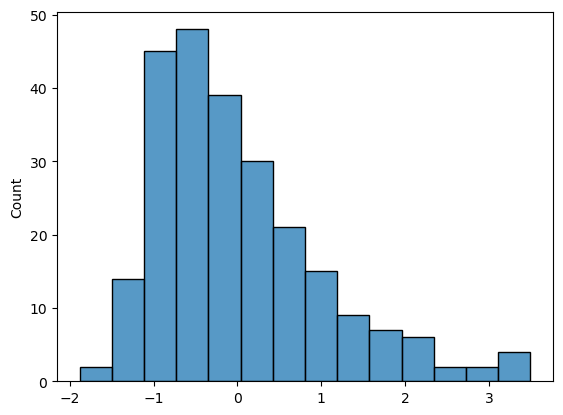

In [38]:
sns.histplot(normalized_data)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler= StandardScaler()

In [41]:
scaler

StandardScaler()

In [43]:
scaler.fit(df[["total_bill"]])

StandardScaler()

In [45]:
scaler.transform(df[["total_bill"]])

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [51]:
import pandas as pd
pd.DataFrame(scaler.fit_transform(df[["total_bill", "tip"]]), columns= ["Total_bill_scaled", "tip_scaled"])  # another direct way

,Total_bill_scaled,tip_scaled
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


In [52]:
scaler.transform([[13, 4]])   # scaling for new entry

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.76382571,  0.72546447]])

# Normalization ---min max scaler

In [54]:
df= sns.load_dataset("taxis")
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
min_max= MinMaxScaler()

In [57]:
min_max.fit_transform(df[["distance", "fare", "tip"]])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

In [60]:
min_max.transform([[1.46,4, 23.2]])   #new entry

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.03978202, 0.02013423, 0.69879518]])

# Feature scaling using Unit vector

In [61]:
from sklearn.preprocessing import normalize   # uses unit vector concept

In [63]:
norm= normalize

In [64]:
norm(df[["fare", "distance", "tip"]])

array([[0.93389384, 0.21346145, 0.28683882],
       [0.98774694, 0.15606402, 0.        ],
       [0.93973084, 0.1716575 , 0.29570197],
       ...,
       [0.96811656, 0.25050016, 0.        ],
       [0.98302025, 0.18349711, 0.        ],
       [0.94658025, 0.2429556 , 0.21203398]])

# Data Encoding

In [33]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [34]:
## create a simple dataframe
df= pd.DataFrame({"color": ["red", "green", "blue", "yellow", "pink", "red", "green", "magenta"]})

In [16]:
df

,color
0,red
1,green
2,blue
3,yellow
4,pink
5,red
6,green
7,magenta


In [17]:
encoder= OneHotEncoder()    # instance

In [18]:
## Perform fit and then transform
encoder.fit(df[["color"]])

OneHotEncoder()

In [19]:
encoded_val= encoder.transform(df[["color"]]).toarray()

In [20]:
import pandas as pd
encoded_val = pd.DataFrame(encoded_val, columns= encoder.get_feature_names_out())

In [21]:
encoded_val

,color_blue,color_green,color_magenta,color_pink,color_red,color_yellow
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0


In [22]:
encoder.transform([["blue"]]).toarray()    # new entry

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0., 0., 0., 0.]])

In [23]:
pd.concat([df, encoded_val], axis= 1)

,color,color_blue,color_green,color_magenta,color_pink,color_red,color_yellow
0,red,0.0,0.0,0.0,0.0,1.0,0.0
1,green,0.0,1.0,0.0,0.0,0.0,0.0
2,blue,1.0,0.0,0.0,0.0,0.0,0.0
3,yellow,0.0,0.0,0.0,0.0,0.0,1.0
4,pink,0.0,0.0,0.0,1.0,0.0,0.0
5,red,0.0,0.0,0.0,0.0,1.0,0.0
6,green,0.0,1.0,0.0,0.0,0.0,0.0
7,magenta,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
df= sns.load_dataset("tips")

In [25]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder()

In [27]:
encoder.fit(df[["sex", "smoker", "day", "time"]])

OneHotEncoder()

In [28]:
encoded_data= encoder.transform(df[["sex", "smoker", "day", "time"]]).toarray()

In [29]:
encoded_data= pd.DataFrame(encoded_data, columns= encoder.get_feature_names_out())

In [30]:
encoded_data

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [31]:
pd.concat([df, encoded_data], axis= 1)

,total_bill,tip,sex,smoker,day,time,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,Female,No,Sun,Dinner,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,Female,No,Sun,Dinner,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,17.82,1.75,Male,No,Sat,Dinner,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [35]:
df

,color
0,red
1,green
2,blue
3,yellow
4,pink
5,red
6,green
7,magenta


In [37]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder= LabelEncoder()

In [40]:
lbl_encoder.fit_transform(df[["color"]])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4, 1, 0, 5, 3, 4, 1, 2])

Problem with Nominal encoding is that the since each unique value is having different number, suppose here red is assigned as 4 and green is assigned as 1. So my ML or Dl Model may think in a way that red is of greater importance than green 

In [41]:
lbl_encoder.transform([["red"]])   # new entry

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([4])

## Ordinal Encoding----> used to assign ranking
High school :1
college:2 
graduate: 3
post- graduate :4


In [45]:
## ordinal enconding
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder(categories=[["small", "medium", "large", "very_large"]])

In [43]:
import pandas as pd
df= pd.DataFrame({"size": ["small", "medium", "large", "very_large"]})

In [44]:
ord_encoder.fit_transform(df[["size"]])

array([[2.],
       [1.],
       [0.],
       [3.]])

## Target guided Encoding

In [1]:
import pandas as pd

# create a sample dataframe with a categorical variable and a target variable
df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})

In [2]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [3]:
mean_price= df.groupby("city")["price"].mean()

In [4]:
mean_price

city
London      150.0
New York    190.0
Paris       310.0
Tokyo       250.0
Name: price, dtype: float64

In [5]:
df["city_encoded"]= df["city"].map(mean_price)

In [6]:
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


In [7]:
import seaborn as sns
df= sns.load_dataset("tips")

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
mean_bill= df.groupby("time")["total_bill"].mean()

In [10]:
mean_bill

time
Lunch     17.168676
Dinner    20.797159
Name: total_bill, dtype: float64

In [11]:
df["time_encoded"] = df["time"].map(mean_bill)

In [12]:
df

,total_bill,tip,sex,smoker,day,time,size,time_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,20.797159
1,10.34,1.66,Male,No,Sun,Dinner,3,20.797159
2,21.01,3.50,Male,No,Sun,Dinner,3,20.797159
3,23.68,3.31,Male,No,Sun,Dinner,2,20.797159
4,24.59,3.61,Female,No,Sun,Dinner,4,20.797159
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.797159
240,27.18,2.00,Female,Yes,Sat,Dinner,2,20.797159
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.797159
242,17.82,1.75,Male,No,Sat,Dinner,2,20.797159


# Covariance and correlation

In [19]:
import seaborn as sns
df= sns.load_dataset("healthexp")

In [20]:
df

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


In [21]:
## covariance
import numpy as np

In [22]:
df.cov()

/tmp/ipykernel_704/1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Year,Spending_USD,Life_Expectancy
Year,201.098848,2.571883e+04,41.915454
Spending_USD,25718.827373,4.817761e+06,4166.800912
Life_Expectancy,41.915454,4.166801e+03,10.733902


In [24]:
## Spearman Correlation
df.corr(method= "spearman")

/tmp/ipykernel_704/3060966459.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method= "spearman")


,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.931598,0.896117
Spending_USD,0.931598,1.000000,0.747407
Life_Expectancy,0.896117,0.747407,1.000000


In [25]:
df.corr(method= "pearson")    # pearson corr

/tmp/ipykernel_704/4159550312.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method= "pearson")


,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.826273,0.902175
Spending_USD,0.826273,1.000000,0.579430
Life_Expectancy,0.902175,0.579430,1.000000


In [26]:
df1= sns.load_dataset("penguins")

In [28]:
df1.corr()

/tmp/ipykernel_704/473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000
